In [270]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Utility w/ N_bar

In [271]:
# utility function
def utility(x):
    return np.sqrt(x)

def p(N_bar):
    return 10.0/(N_bar+10.0)

def ransom(N, N_bar):
    return 10000.0/(N_bar+1.0) + 2000.0/(N+1.0) + 2000.0

# insurance premium, P
def premium(p, R):
    return p*R

# probability of death, q
def q(N, N_bar):
    return np.log((N / 150.0) + (10.0/N_bar))

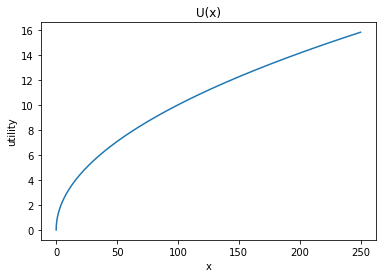

In [272]:
# utility function properties

x = np.arange(0, 250, 0.01)
u_y = utility(x)
plt.plot(x, u_y)
plt.title('U(x)')
plt.xlabel('x')
plt.ylabel('utility')
plt.show()

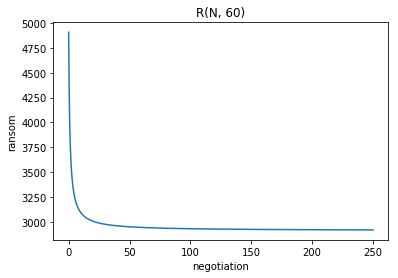

In [273]:
# ransom function properties
# 

r_y = ransom(x, 10)
plt.plot(x, r_y)
plt.title('R(N, 60)')
plt.ylabel('ransom')
plt.xlabel('negotiation')
# plt.axis([0, 500, 90, 100])
plt.show()

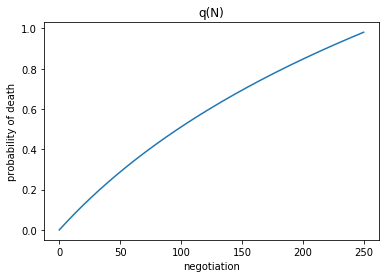

In [274]:
# death function properties

d_y = q(x, 10)
plt.plot(x, d_y)
plt.title('q(N)')
plt.xlabel('negotiation')
plt.ylabel('probability of death')
plt.show()


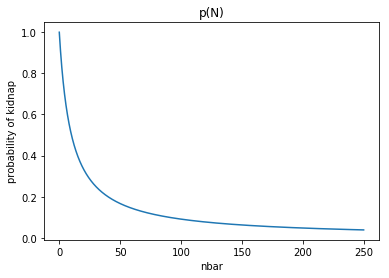

In [275]:
k_y = p(x)
plt.plot(x, k_y)
plt.title('p(N)')
plt.xlabel('nbar')
plt.ylabel('probability of kidnap')
plt.show()


In [341]:
# expected utility function with p, W, D, K, N, N_bar as exogenous variables
xvals = np.arange(0, 250, .01)

def expected_utility(W, D, K, N, N_bar):
    P = premium(p(N_bar), ransom(N, N_bar))
    return (1-p(N_bar))*utility(W-P) + \
            p(N_bar)*q(N, N_bar)*utility(W-P-D) + \
            p(N_bar)*(1-q(N, N_bar))*utility(W-P-K)

In [277]:
# setting exogenous variables
# p = .05
W = 500000
D = 9000
K = 3000
N_bar = 10

# function of N
def U(N, N_bar):
    return expected_utility(W, D, K, N, N_bar)

In [278]:
p(10)
# U(5,5)

0.5

[ 4909.09090909  4889.28892889  4869.87522282 ...,  2917.05998906
  2917.05967154  2917.05935405]
[ 704.30413926  704.31102553  704.31777392 ...,  702.91468126  702.91462794
  702.91457462]


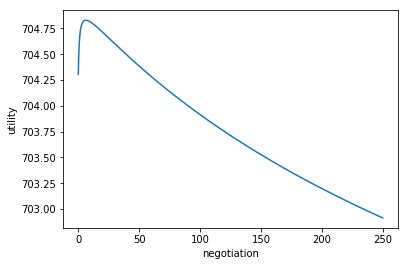

In [279]:
yvals = U(xvals, N_bar)
plt.plot(xvals, yvals)
plt.xlabel('negotiation')
plt.ylabel('utility')
# plt.axis([0, 100, 270, 290])
plt.show()

In [280]:
# negotiation yielding the max utility
i = np.nanargmax(yvals)
max_negotiation = xvals[i]

print 'max utility =', yvals[i]
print 'max negotiation=', max_negotiation
print 'n_bar=', N_bar

max utility = 704.828618136
max negotiation= 6.2
n_bar= 10


In [339]:
# create dataset with N, N bar values
Nbar_vals = np.arange(0.01, 100, 0.01)
def solve_fixed_point(Nbars):
    result = []
    Ns = np.arange(0.01, 100, .01)
    for Nbar in Nbars:
        EUs = U(Ns, Nbar)
        i = np.nanargmax(EUs)
        max_N = Ns[i]
#         eu = U(max_N, Nbar)
        result.append({'n': max_N, 'nbar': Nbar})
    return result

In [342]:
optimal_pairs = solve_fixed_point(Nbar_vals)
optimal_pairs

[{'n': 99.990000000000009, 'nbar': 0.01},
 {'n': 99.990000000000009, 'nbar': 0.02},
 {'n': 99.990000000000009, 'nbar': 0.029999999999999999},
 {'n': 99.990000000000009, 'nbar': 0.040000000000000001},
 {'n': 99.990000000000009, 'nbar': 0.050000000000000003},
 {'n': 91.75, 'nbar': 0.060000000000000005},
 {'n': 84.840000000000003, 'nbar': 0.069999999999999993},
 {'n': 79.27000000000001, 'nbar': 0.080000000000000002},
 {'n': 74.660000000000011, 'nbar': 0.089999999999999997},
 {'n': 70.77000000000001, 'nbar': 0.099999999999999992},
 {'n': 67.410000000000011, 'nbar': 0.11},
 {'n': 64.490000000000009, 'nbar': 0.12},
 {'n': 61.909999999999997, 'nbar': 0.13},
 {'n': 59.609999999999999, 'nbar': 0.14000000000000001},
 {'n': 57.549999999999997, 'nbar': 0.15000000000000002},
 {'n': 55.68, 'nbar': 0.16},
 {'n': 53.990000000000002, 'nbar': 0.17000000000000001},
 {'n': 52.43, 'nbar': 0.18000000000000002},
 {'n': 51.0, 'nbar': 0.19},
 {'n': 49.68, 'nbar': 0.20000000000000001},
 {'n': 48.460000000000001

In [343]:
df = pd.DataFrame(data=optimal_pairs)

In [344]:
df

,n,nbar
0,99.99,0.01
1,99.99,0.02
2,99.99,0.03
3,99.99,0.04
4,99.99,0.05
5,91.75,0.06
6,84.84,0.07
7,79.27,0.08
8,74.66,0.09
9,70.77,0.10


In [345]:
df.columns[0:]

Index([u'n', u'nbar'], dtype='object')

In [346]:
n_stars = df.as_matrix(columns=df.columns[0:1])

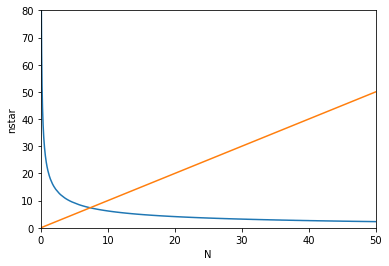

In [347]:
plt.plot(Nbar_vals, n_stars)
plt.plot(nrange, nrange)
plt.xlabel('N')
plt.ylabel('nstar')
plt.axis([0, 50, 0, 80])
plt.show()

[ 665.20202198  668.32622183  670.20020702 ...,  706.88053432  706.88052696
  706.8805196 ]


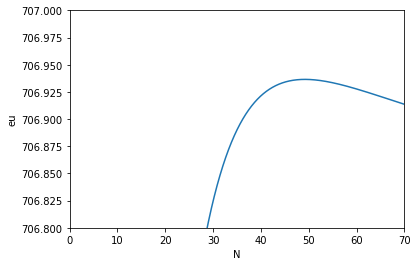

In [356]:
eu_vals = U(Nbar_vals, Nbar_vals)
print(eu_vals)
plt.plot(Nbar_vals, eu_vals)
# plt.plot(nrange, nrange)
plt.xlabel('N')
plt.ylabel('eu')
plt.axis([0, 70, 706.8, 707])
plt.show()

In [349]:
i = np.nanargmax(eu_vals)
max_negotiation = Nbar_vals[i]

print 'max utility =', eu_vals[i]
print 'max negotiation=', max_negotiation
# print 'n_bar=', N_bar

max utility = 706.936508071
max negotiation= 49.21


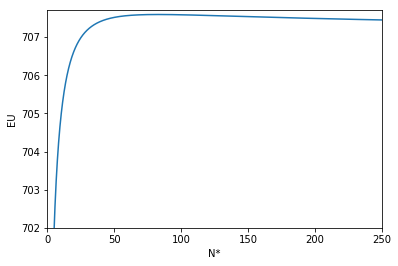

In [326]:
eu_range = df.as_matrix(columns=df.columns[0:1])
plt.plot(Nbar_vals, eu_range)
plt.xlabel('N*')
plt.ylabel('EU')
plt.axis([0, 250, 702, 707.7])
plt.show()

In [327]:
i = np.nanargmax(eu_range)
max_negotiation = Nbar_vals[i]

print 'max utility =', eu_range[i]
print 'max negotiation=', max_negotiation
# print 'n_bar=', N_bar

max utility = [ 707.59129227]
max negotiation= 82.81
n_bar= 10


# Utility w/ N_bar

ImportError: cannot import name exceptions

In [ ]:

# literature review-- if another student were to pick up trail, write summary of lit review
# get data for explanatory stuff